In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [3]:
# Loading the dataset
df= pd.read_csv(r'drive/My Drive/Colab Notebooks/Dataset/audit_data.csv')
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
# Exploration
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [5]:
# As this is a classification task, check the classes quantity.

print(f'''Risk '1' = {df.Risk[df['Risk'] == 1].count()}''')
print(f'''Risk '0' = {df.Risk[df['Risk'] == 0].count()}''')

Risk '1' = 305
Risk '0' = 471


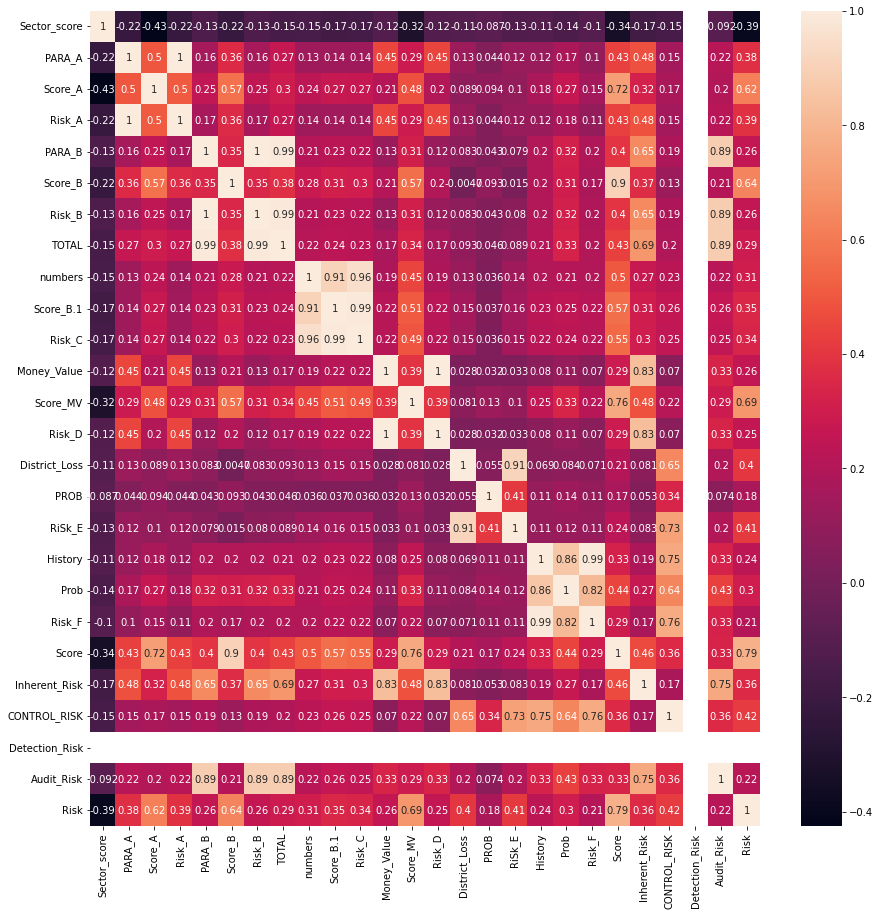

In [6]:
#EDA

import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [8]:
#Splitting
X=df.drop('Risk',axis='columns')
y=df['Risk']

#prevent Nan too much error
df.fillna(999, inplace=True)



#1. built selector
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

#Now, we create our ColumnTransfomer by specifying three values: the preprocessor name, the transformer, and the columns. 
#First, let’s create the preprocessors for the numerical and categorical parts.

from sklearn.preprocessing import OrdinalEncoder, StandardScaler

categorical_preprocessor = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numerical_preprocessor = StandardScaler()

#2. create transformers

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('Ordinalencoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)],remainder='passthrough')

#3. built model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier 

model = make_pipeline(preprocessor ,RandomForestClassifier())

#4. splitting our data into train and test sets.
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    X, y, random_state=42)

#5 train model

model.fit(data_train, target_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['LOCATION_ID']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Sector_score', 'PARA_A',
                                                   'Score_A', 'Risk_A',
                                                   'PARA_B', 'Score_B',
                                                   'Risk_B', 'TOTAL', 'numbers',
                                                   'Score_B.1', 'Risk_C',
                                                   'Money_Value', 'S

In [10]:
#Evaluation

target_predicted = model.predict(data_test)

print(model.score(data_test, target_test))  


1.0


In [13]:
#Classification report

print(classification_report(target_test, target_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00        75

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194

